In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

dataset = pd.DataFrame(data=iris['data'], columns=feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


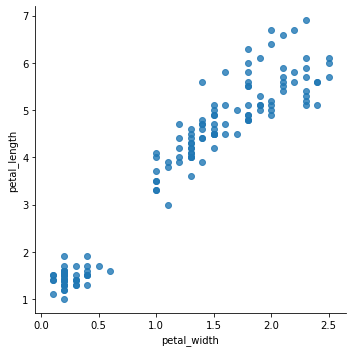

In [4]:
sns.lmplot(x='petal_width', y='petal_length', data=dataset, fit_reg=False)

In [5]:
from sklearn.cluster import KMeans

In [6]:
X = np.array(dataset[["petal_width", "petal_length"]])

print("X=", X.shape)

X= (150, 2)


In [7]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10)
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
Y_pred = kmeans_model.predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

/home/ec2-user/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


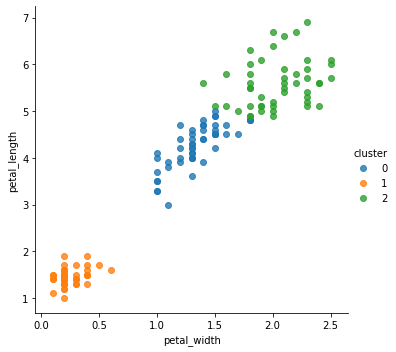

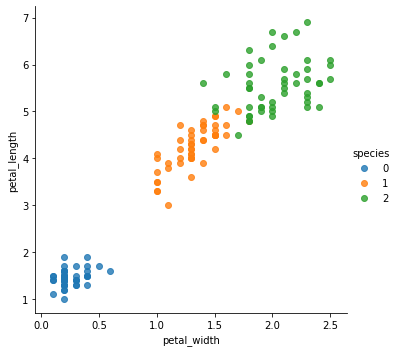

In [9]:
temp = dataset[["petal_width", "petal_length", "species"]]
temp['cluster'] = kmeans_model.labels_

# k-means法によるクラスタリング結果
sns.lmplot(x="petal_width", y="petal_length", data=temp, hue="cluster", fit_reg=False)
# アヤメの品種
sns.lmplot(x="petal_width", y="petal_length", data=temp, hue="species", fit_reg=False)

In [10]:
# 各クラスタ化毎のWCSSを格納するリスト
wcss = []

# クラスタ数のリスト(１から９)
c_list = np.arange(1, 10)

for c in c_list:
    # クラスタ数をcで設定
    kmeans_model = KMeans(n_clusters=c, init='k-means++', n_init=10)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

In [11]:
wcss

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.025145110250374,
 9.191170634920635,
 7.7100484192151315,
 6.571176847662142]

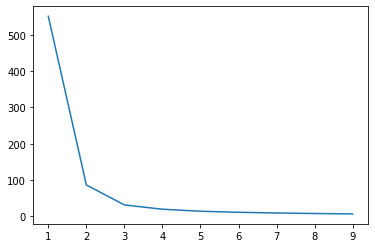

In [12]:
sns.lineplot(x=c_list, y=wcss)

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [14]:
# クラスタ数の指定
cluster_no = 3

# クラスタリング
kmeans_model = KMeans(n_clusters=cluster_no, init='k-means++', n_init=10)
Y_pred = kmeans_model.fit_predict(X)

In [15]:
# シルエットスコアの平均値
s_average = silhouette_score(X, Y_pred)
# 各データのシルエットスコア
s_score = silhouette_samples(X, Y_pred, metric='euclidean')

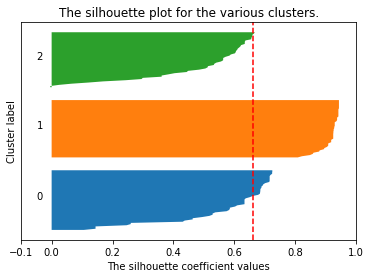

In [16]:
# シルエットプロットの描写
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
y_lower = 0

for i in range(cluster_no):
    ith_cluster_silhouette_values = s_score[Y_pred == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
    
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=s_average, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
gaussian_model = GaussianMixture(n_components=3, n_init=10)
gaussian_model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [19]:
Y_pred = gaussian_model.predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

/home/ec2-user/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


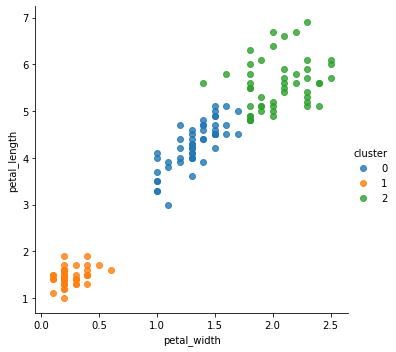

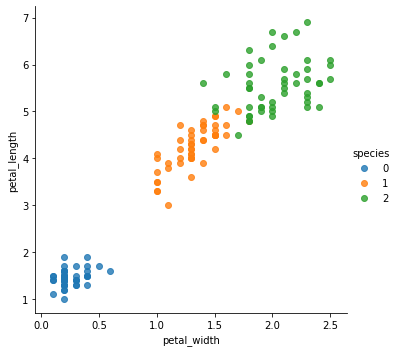

In [20]:
temp = dataset[['petal_width', 'petal_length', 'species']]
temp['cluster'] = Y_pred

sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='cluster', fit_reg=False)
sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='species', fit_reg=False)

In [21]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
dists = pdist(X)
dists.shape

(11175,)

In [24]:
dists2 = squareform(dists)
dists2.shape

(150, 150)

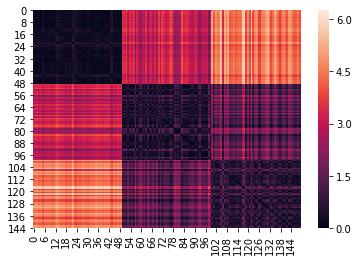

In [25]:
sns.heatmap(dists2)

In [26]:
Z = linkage(dists, 'ward')

In [27]:
Z[0]

array([0., 1., 0., 2.])

In [28]:
Z[:,0]

array([  0.,   4.,   2.,   3.,   8.,   6.,  10.,  28.,   9.,  27.,  11.,
        12.,  14.,  15.,  40.,  45.,  38.,  42.,  29.,  30.,  46.,  34.,
        39.,  48.,  31.,  33.,  47.,  49.,  57.,  60.,  53.,  89.,  88.,
        94.,  74.,  65.,  51.,  68.,  78.,  84.,  50.,  52.,  70., 138.,
       123., 101., 116., 136.,  55.,  62., 119., 110., 115., 112., 100.,
         5.,  69.,  58.,  85.,  18.,  56., 114.,  76., 146., 103.,  16.,
        95.,  19.,  92.,  54., 149.,  23.,  90.,  83., 132.,  80., 104.,
       125., 111.,  13., 158., 105., 193., 184., 162., 144., 182., 124.,
       121., 148., 165., 122., 143., 170., 108.,  24.,  73., 185.,  77.,
        43., 107.,  81.,  59., 102., 135., 210., 139., 173., 208., 220.,
       177., 191.,  61., 211., 234., 199., 246., 217.,  98.,  64., 118.,
       227., 247., 237., 134., 243., 229., 256., 252., 235., 258., 267.,
       232., 268., 250., 260., 254., 263., 272., 274., 281., 282., 278.,
       286., 270., 288., 291., 295., 290.])

In [29]:
Z[108]

array([208.        , 219.        ,   0.26140645,   8.        ])

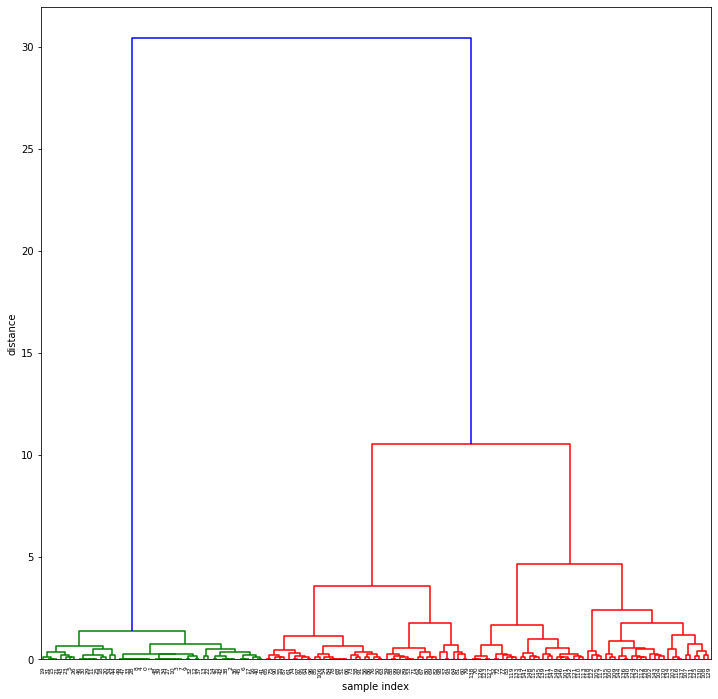

In [30]:
fig = plt.figure(figsize=(12, 12))

plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=6.,
)

plt.show()